## Simple Linear Regression
- It has one independent and one dependent feature

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression

In [86]:
df = pd.read_csv('Datasets/height-weight.csv')

In [87]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0.5, 1.0, 'Weight - Height correlation')

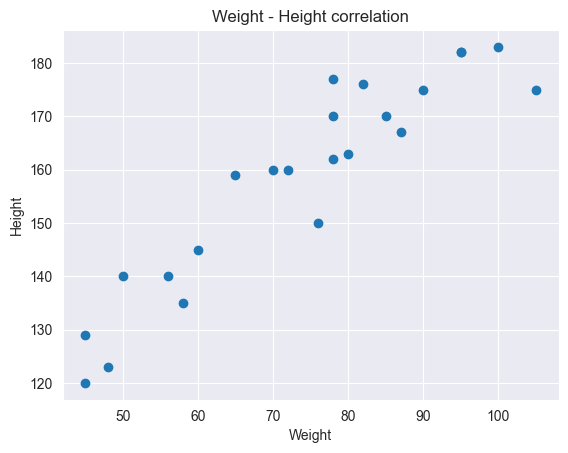

In [88]:
#Scatter plot
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Weight - Height correlation')

In [89]:
## Correlation
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


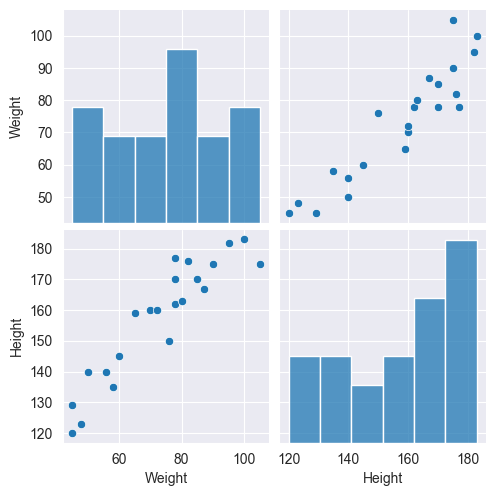

In [90]:
sns.pairplot(df)

<Axes: >

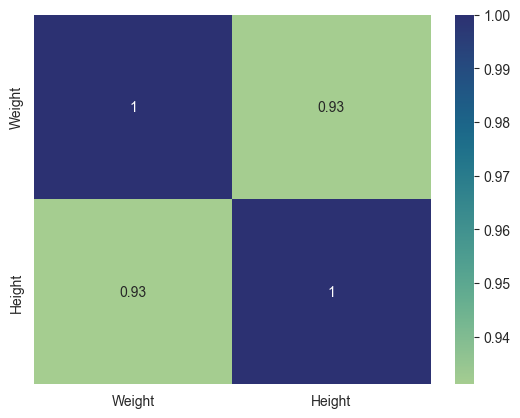

In [91]:
sns.heatmap(df.corr(), cmap='crest', annot=True)

In [92]:
#Independent and dependent features
X = df[['Weight']] #independent feature should be Dataframe or 2D Array, use [[]] for Dataframe and [] for Series
y = df['Height'] ## Dependent feature can be Series or 1D array because it is only one column at the end.

In [93]:
np.array(X).shape

(23, 1)

In [94]:
X_series = df['Weight']
np.array(X_series).shape

(23,)

In [95]:
y.shape

(23,)

In [96]:
## Train Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)



In [97]:
X_train.shape

(17, 1)

## Standardization

In [98]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

### Note -> We use scaler.fit_transform(X_train) for training data and scaler.transform(X_test) because we don't want any data leakage and use the same mean and standard deviation of the test data in training data

In [99]:
X_test = scaler.transform(X_test)

In [114]:
type(X_test)

numpy.ndarray

In [100]:
#Apply Simple linear regression
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [101]:
print("coefficient or slope:",model.coef_)
print("Intercept:",model.intercept_)

coefficient or slope: [17.2982057]
Intercept: 156.47058823529412


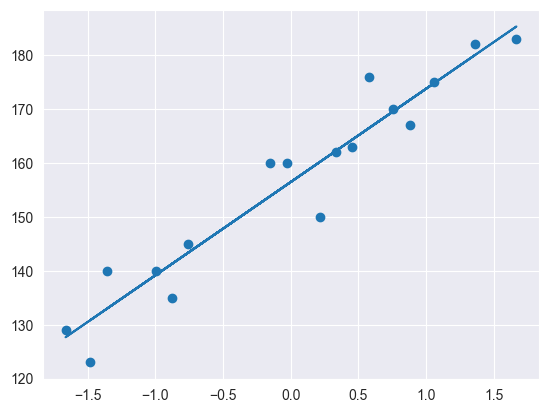

In [102]:
##PLot training data plot best fit line
plt.scatter(X_train, y_train)
plt.plot(X_train, model.predict(X_train))

In [103]:
#prediction for test data
y_pred = model.predict(X_test)

In [104]:
y_pred

array([162.26499721, 162.26499721, 127.68347133, 180.07972266,
       148.64197186, 190.55897293])

In [105]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, accuracy_score
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

114.84069295228699
9.66512588679501
10.716374991212605


In [106]:
from sklearn.metrics import r2_score

In [107]:
score = r2_score(y_test, y_pred)

In [108]:
score

0.7360826717981276

In [109]:
#display adjusted R_squared
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6701033397476595

In [110]:
##OLS Linear Regression for intercept and coefficient
import statsmodels.api as sm
statmodel = sm.OLS(y_train, X_train).fit()

In [111]:
pred = statmodel.predict(X_test)
print(pred)

[  5.79440897   5.79440897 -28.78711691  23.60913442  -7.82861638
  34.08838469]


In [112]:
print(statmodel.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Wed, 19 Nov 2025   Prob (F-statistic):                       0.664
Time:                        08:02:17   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [113]:
##Prediction for new data
model.predict(scaler.transform([[72]]))

E:\udemy\PythonBootcamp\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([155.97744705])